# Neural Network Regression with TensorFlow

- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

In [17]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.14.0


## Typical architecture of a regresison neural network

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


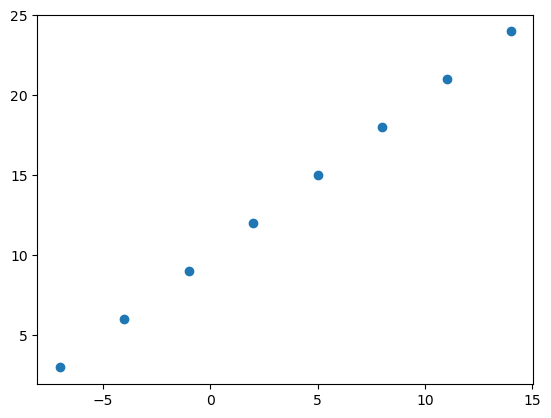

In [5]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [8]:
# Before [-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0] 
# After  [[-7.0], [-4.0], ...,         [11.0], [14.0]]
X = tf.expand_dims(X, axis=-1)

In [6]:
# Set random seed
tf.random.set_seed(42)

In [11]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model: define loss function, optimizer
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.legacy.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 142ms/step - loss: 8.2180 - mae: 8.2180
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 8.0855 - mae: 8.0855
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 7.9530 - mae: 7.9530
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 7.8205 - mae: 7.8205
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 7.6880 - mae: 7.6880


In [13]:
# Check the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- view a 2D plot of the model using `plot_model()`

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True)

## Example
- Objective: predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

In [15]:
df = pd.read_csv("../../data/insurance.csv")

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
numerical_cols = df.iloc[:, :-1].select_dtypes(include=np.number).columns.to_list()
categorical_cols = df.iloc[:, :-1].select_dtypes(exclude=np.number).columns.to_list()


### Pre-processing Data
- Categorical:
    - Encoding: Turning all of your data to numbers
- Numerical:
    - Normalisation (Min-Max Scaling): scaling all values from their original range from, e.g. between 0 and 100,000 to be between 0 and 1.
    - Standardization: converts all of your data to unit variance and 0 mean.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), numerical_cols), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols)
)


In [75]:
X = df.drop("charges", axis=1)
y = df["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [77]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

### Model Creation & Training

In [85]:
# Build the model (3 layers, 64, 32, 1 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1),
])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['mae'])
history = model.fit(X_train_normal, y_train, 
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[callback],
                    verbose=0
                    )
# Evaluate the model on the test set
model.evaluate(X_test_normal, y_test) # return loss, metrics

9/9 [==============================] - 0s 4ms/step - loss: 3439.1252 - mae: 3439.1252


[3439.125244140625, 3439.125244140625]

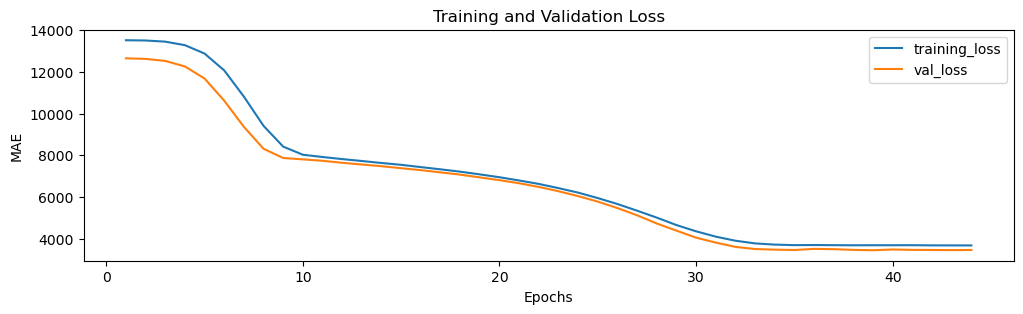

In [86]:

def plot_history(loss, val_loss):
    _, ax = plt.subplots(figsize=(12,3))
    epochs = [i + 1 for i in range(len(loss))]
    ax.plot(epochs, loss, label='training_loss')
    ax.plot(epochs, val_loss, label='val_loss')
    ax.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='MAE')

    ax.legend()
    plt.show()

plot_history(history.history['loss'], history.history['val_loss'])


### Save & Load Model
You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default in TensorFlow 2.x): more integrated into the TensorFlow ecosystem, such as TensorFlow Serving
    - For example: `assets, keras_metadata.pb variables, fingerprint.pb, saved_model.pb`
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format) (default in TensorFlow 1.x) 

In [88]:
# Save the entire model as a SavedModel format
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [89]:
!ls saved_model/my_model

assets            keras_metadata.pb variables
fingerprint.pb    saved_model.pb


In [91]:
#Save a model using the HDF5 format
model.save("saved_model/model.h5") # note the addition of '.h5' on the end

In [92]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model('saved_model/my_model')
loaded_saved_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 128)               1536      
                                                                 
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dense_66 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
